In [1]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
base_dir = "/Users/szhan/Projects/tsimpute/analysis/genealogy_only/"
in_prefix = "ten_ceu_yri_t0_p10"

In [3]:
num_reps = 100

results = None
for i in np.arange(1, num_reps + 1):
    # i1.csv_1.csv
    in_file = base_dir + in_prefix + "/"
    in_file += "i" + str(i) + ".csv" + "_" + str(i) + ".csv"
    
    if os.path.exists(in_file):
        df = pd.read_csv(in_file, skiprows=20)
        results = df if results is None else pd.concat([results, df])
    else:
        print(f"Not found {in_file}")

Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/ten_ceu_yri_t0_p10/i42.csv_42.csv


In [4]:
tmp = df[["maf", "iqs"]].dropna(axis=0)
values = np.vstack([tmp["maf"], tmp["iqs"]])
kernel = stats.gaussian_kde(values)

x = kernel(np.vstack([tmp["maf"], tmp["iqs"]]))

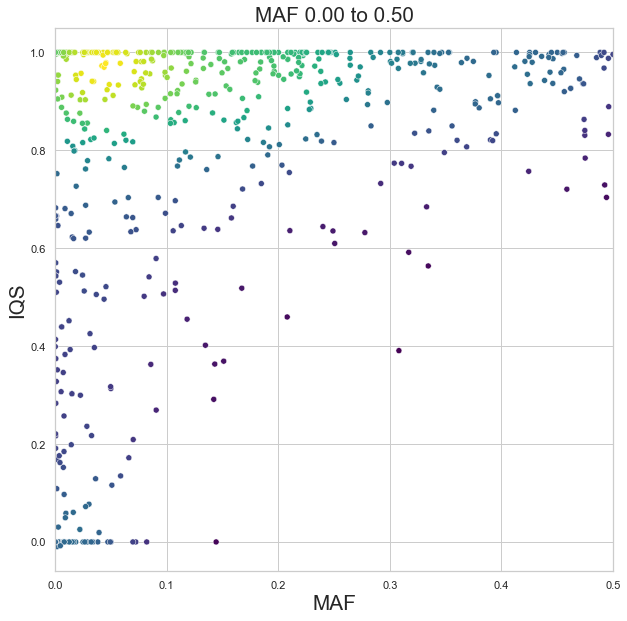

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title(
    f"MAF 0.00 to 0.50",
    size="xx-large"
)

ax.set_xlim([0, 0.50])

ax.set_ylabel("IQS", size="xx-large")
#ax.set_ylabel("Total concordance", size="xx-large")
ax.set_xlabel("MAF", size="xx-large")

g = sns.scatterplot(
    y="iqs",
    x="maf",
    data=tmp,
    c=x,
    cmap="viridis",
    x_jitter=True,
    ax=ax
);

In [6]:
out_file = in_prefix + ".iqs.png"
#out_file = in_prefix + ".total_concordance.png"
g.get_figure().savefig(out_file)